In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

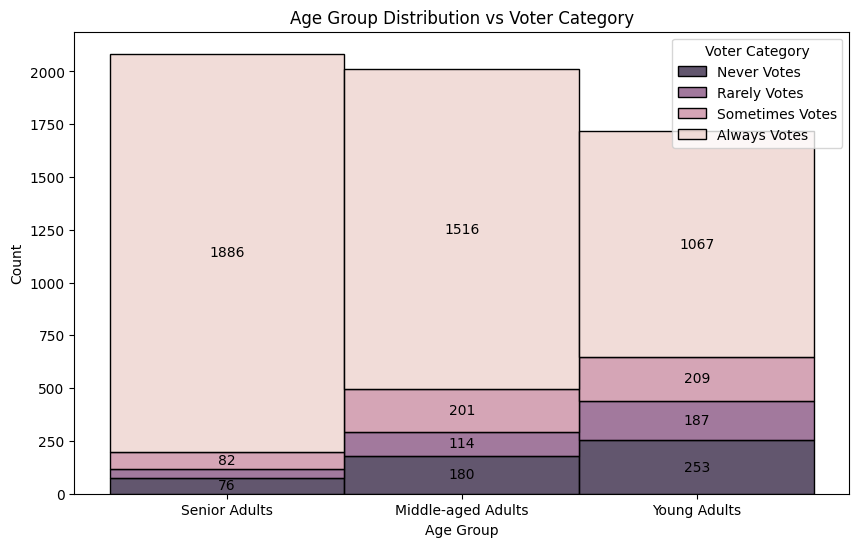

In [23]:
data = pd.read_csv('modified_data.csv')

# plot histogram for Age_grp with Q24
temp = data[data['Q24'] != -1]
plt.figure(figsize=(10, 6))
sns_hist  = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')
# set data labels
plt.legend(title='Voter Category', labels=['Never Votes', 'Rarely Votes','Sometimes Votes', 'Always Votes'])
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                     va = 'center', ha = 'center',)
plt.savefig('./Topic charts/topic-1.png', dpi=300, bbox_inches='tight')
plt.show()

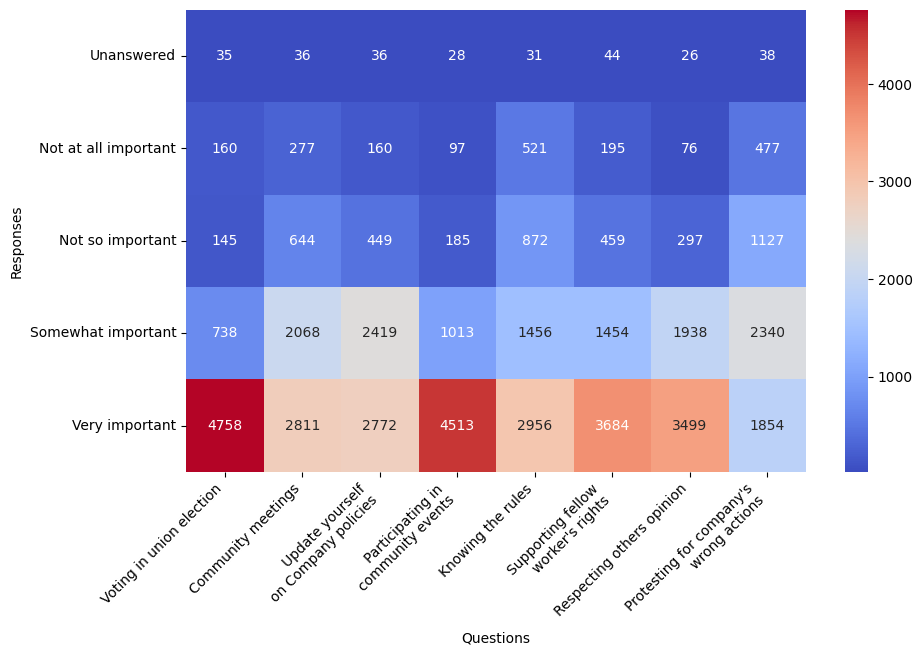

In [21]:
data = pd.read_csv('no_encoding_data.csv')

# plot heatmap for Q2_1 to Q2_10 columns
q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_10']


# Replace -1 with a meaningful label in the data
data[q2_columns] = data[q2_columns].replace('-1', 'Unanswered')

pivot_table = data[q2_columns].apply(pd.Series.value_counts).fillna(0)

pivot_table = pivot_table.reindex(['Unanswered', 'Not at all important', 'Not so important',
                                   'Somewhat important', 'Very important'])

temp = data[data[q2_columns] != -1]
plt.figure(figsize=(10, 6))
sns_heatmap = sns.heatmap(pivot_table, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Questions')
plt.ylabel('Responses')
# Set the x-axis labels
sns_heatmap.set_xticklabels(['Voting in union election', 'Community meetings', 'Update yourself\non Company policies',
                             'Participating in\ncommunity events', 'Knowing the rules',
                             "Supporting fellow\nworker's rights", 'Respecting others opinion',
                             "Protesting for company's\nwrong actions"],
                            rotation=45, ha='right')

plt.savefig('./Topic charts/Q-2.png', dpi=300, bbox_inches='tight')

Q2_1 vs Voter Category
| voter_category   |   Very important |   Somewhat important |   Not so important |   Not at all important |
|:-----------------|-----------------:|---------------------:|-------------------:|-----------------------:|
| always           |             1707 |                   88 |                  7 |                      4 |
| rarely/never     |              779 |                  407 |                115 |                    133 |
| sporadic         |             2272 |                  243 |                 23 |                     23 |
Q2_2 vs Voter Category
| voter_category   |   Very important |   Somewhat important |   Not so important |   Not at all important |
|:-----------------|-----------------:|---------------------:|-------------------:|-----------------------:|
| always           |             1075 |                  563 |                117 |                     46 |
| rarely/never     |              419 |                  588 |                285 

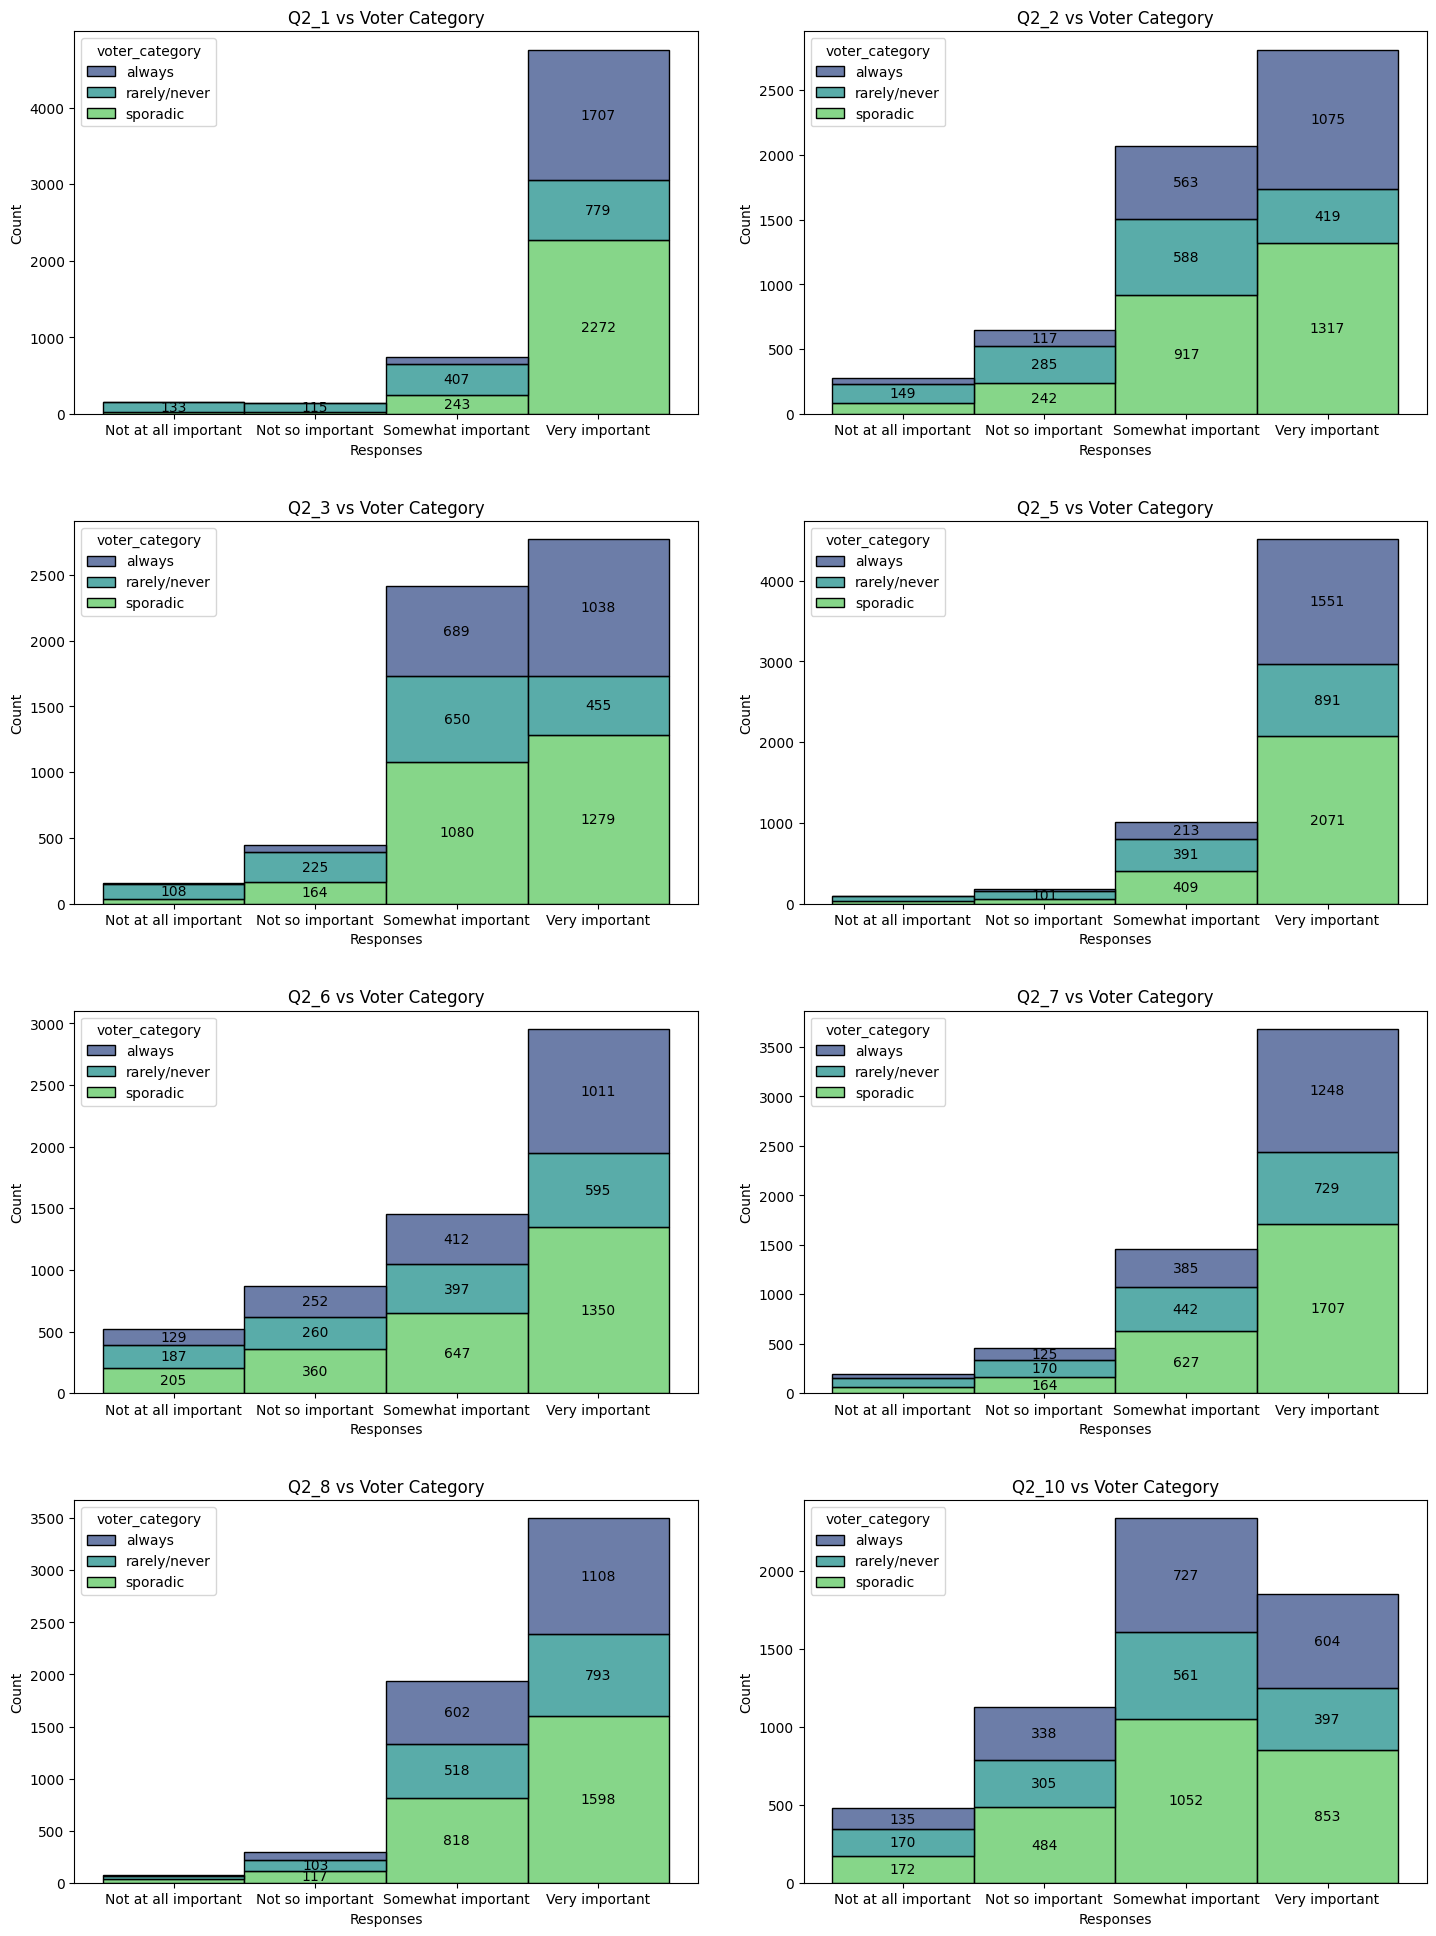

In [39]:
data = pd.read_csv('no_encoding_data.csv')

q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_10']
# make a pivot table for Q2_1 to Q2_10 columns vs voter_category
# pivot_table = pd.pivot_table(data, index='voter_category', 
#                              values=q2_columns, fill_value=0,
#                              aggfunc=lambda x: x.value_counts().to_dict())
# print(pivot_table.to_markdown())

# plot histogram for Q2_1 to Q2_10 columns vs voter_category
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, col in enumerate(q2_columns):
    temp = data[data[col] != '-1'].sort_values(by=['voter_category', col])
    
    pivot_table = pd.pivot_table(temp, index='voter_category', 
                             values=col, fill_value=0,
                             aggfunc=lambda x: x.value_counts().to_dict())
    # Convert the pivot table to a DataFrame
    pivot_df = pd.DataFrame(pivot_table[col].tolist(), index=pivot_table.index)
    print(f'{col} vs Voter Category')
    print(pivot_df.to_markdown())

    sns_hist = sns.histplot(data=temp, x=col, hue='voter_category', multiple='stack',
                            ax=axes[i//2, i % 2], palette='viridis')
    axes[i//2, i % 2].set_title(f'{col} vs Voter Category')
    axes[i//2, i % 2].set_xlabel('Responses')
    axes[i//2, i % 2].set_ylabel('Count')
    # annotate each section with data values
    for p in sns_hist.patches:
        height = p.get_height()
        if height > 100:
            axes[i//2, i % 2].annotate(f'{int(height)}',
                                       (p.get_x() + p.get_width() /
                                       2., height/2+p.get_y()),
                                       va='center', ha='center')
plt.tight_layout(pad=3.0)
plt.savefig('./Topic charts/cat-1.png', dpi=300, bbox_inches='tight')
plt.show()